In [1]:
#Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset: digits
digits = datasets.load_digits()

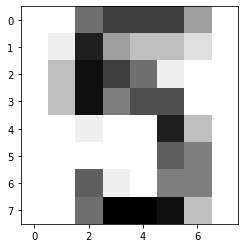

In [2]:
#Display image 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
#Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

#Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier to the training data
knn.fit(X_train, y_train)

#Print the accuracy
print("Accuracy: {0}".format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


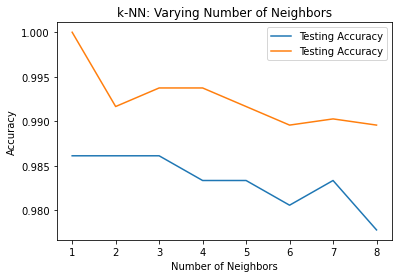

In [5]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over different values of k
for i, k in enumerate(neighbors):
    #Setup a k-NN Classifier with k neighbors: k-nn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

#Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [6]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [7]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

In [8]:
print('Number of training examples', mnist.train_data.shape)
print('Image information', mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x28A04EEAA30>, 5)


C:\Users\ThinhTD\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


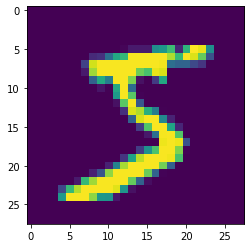

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
            nn.Linear(28*28,10)
        )
        
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim=1)
        return x

In [11]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=False, transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [12]:
def train():
    learning_rate = 1e-3
    num_epochs = 3    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)    
    for epoch in range(num_epochs):
        for batch_idx, (data,target) in enumerate(train_loader):
            output = net(data)            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()            
            if batch_idx % 100 == 0:
                print('Epoch = %f.Batch =%s. Loss = %s' % (epoch,batch_idx,loss.item()))
    return net

In [13]:
net = train()

Epoch = 0.000000.Batch =0. Loss = 2.367169141769409
Epoch = 0.000000.Batch =100. Loss = 0.8526912331581116
Epoch = 0.000000.Batch =200. Loss = 0.5261436104774475
Epoch = 0.000000.Batch =300. Loss = 0.41757234930992126
Epoch = 0.000000.Batch =400. Loss = 0.6698651909828186
Epoch = 0.000000.Batch =500. Loss = 0.4316515326499939
Epoch = 0.000000.Batch =600. Loss = 0.39413344860076904
Epoch = 0.000000.Batch =700. Loss = 0.35680654644966125
Epoch = 0.000000.Batch =800. Loss = 0.24389050900936127
Epoch = 0.000000.Batch =900. Loss = 0.464298278093338
Epoch = 1.000000.Batch =0. Loss = 0.40690144896507263
Epoch = 1.000000.Batch =100. Loss = 0.5436834096908569
Epoch = 1.000000.Batch =200. Loss = 0.2199542224407196
Epoch = 1.000000.Batch =300. Loss = 0.19856512546539307
Epoch = 1.000000.Batch =400. Loss = 0.3174254298210144
Epoch = 1.000000.Batch =500. Loss = 0.3810020685195923
Epoch = 1.000000.Batch =600. Loss = 0.4418194890022278
Epoch = 1.000000.Batch =700. Loss = 0.2631867527961731
Epoch = 1.

In [14]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print('Correct out of %s' % total, correct.item())
print('Percentage accuracy', correct.item()*100/10000.)

Correct out of 10000 9221
Percentage accuracy 92.21


In [15]:
#Liner Regression

In [16]:
#Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Read the CSV file into a Dataframe: df
df = pd.read_csv('D:/SEMESTER 2 - YEAR 4/Advanced Data Mining Applications/Lab/Data_Lab4/gapminder.csv')

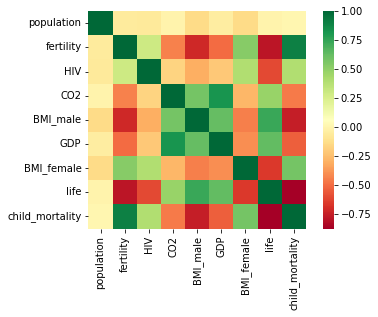

In [17]:
ax = sns.heatmap(df.corr(), square=True, cmap=plt.cm.RdYlGn)
plt.show()

0.6162438752151919


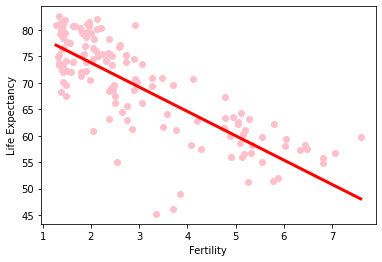

In [18]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

print(reg.score(x_fertility, y_life))

plt.scatter(x_fertility, y_life, color='pink')
plt.plot(prediction_space, y_predict, color='red', linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

In [19]:
features = pd.read_csv('D:/SEMESTER 2 - YEAR 4/Advanced Data Mining Applications/Lab/Data_Lab4/gapminder.csv')
df = pd.read_csv('D:/SEMESTER 2 - YEAR 4/Advanced Data Mining Applications/Lab/Data_Lab4/gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

reg_all =LinearRegression()

reg_all.fit(x_train, y_train)

print(reg_all.score(features, y_life))

0.8914651485793137


In [20]:
#Linear Regression using Pytorch

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

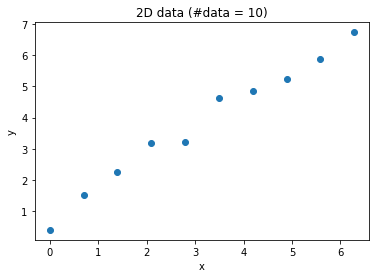

In [22]:
N = 10 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [23]:
import torch

In [24]:
#Data set

In [25]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
        
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]),
            'label': torch.tensor([self.y[idx]])
        }
        return sample


In [26]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])


0 tensor([1., 0.], dtype=torch.float64) tensor([0.4059], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.5082], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.2510], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([3.1949], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.2250], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.6088], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.8367], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.2350], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.8654], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.7263], dtype=torch.float64)


In [27]:
#Data Loader

In [28]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 0
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [29]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples:')
    pp.pprint(samples)


batch# = 0
samples:
{'feature': tensor([[1.0000, 2.7925],
        [1.0000, 6.2832],
        [1.0000, 4.1888],
        [1.0000, 4.8869]], dtype=torch.float64),
 'label': tensor([[3.2250],
        [6.7263],
        [4.8367],
        [5.2350]], dtype=torch.float64)}

batch# = 1
samples:
{'feature': tensor([[1.0000, 3.4907],
        [1.0000, 0.0000],
        [1.0000, 2.0944],
        [1.0000, 5.5851]], dtype=torch.float64),
 'label': tensor([[4.6088],
        [0.4059],
        [3.1949],
        [5.8654]], dtype=torch.float64)}

batch# = 2
samples:
{'feature': tensor([[1.0000, 0.6981],
        [1.0000, 1.3963]], dtype=torch.float64),
 'label': tensor([[1.5082],
        [2.2510]], dtype=torch.float64)}


In [30]:
#Model

In [31]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [32]:
#Setting a model for out problem

In [33]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [34]:
#Cost function

In [35]:
cost = nn.MSELoss()

In [36]:
#Minimizing the cost function

In [38]:
num_epochs = 10
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))    
        optimiser.zero_grad()
        
        error.backward()
        
        optimiser.step()

Epoch = 0


RuntimeError: DataLoader worker (pid(s) 7116, 2052, 13464, 12200) exited unexpectedly

In [ ]:
#Lets see how well the model has learnt the data

In [ ]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

In [ ]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data=%d)' % N)
plt.show()

In [ ]:
#Recommendation Systems

In [ ]:
def user_cf(M, metric='consine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
    return pred    
            
            

In [ ]:
def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,j] - avg_ratings)) / sum(sim_items[j])
    return pred

In [ ]:
M_result = np.asarray([[4,3,2,3], 
 [1,2,3,1],
 [1,2,1,2],
 [4,3,2,4]])
pd.DataFrame(M_result)
M = np.asarray([[4,3,2,3], 
 [1,2,3,1],
 [np.nan,2,1,np.nan],
 [4,3,np.nan,np.nan],
# [1,1,1,1],
 ])
print(M.shape)
print(np.nanmean(M, axis=0))
pd.DataFrame(M)

In [ ]:
def evaluateRS(ratings, groundtruth, method='user_cf', metric='cosine'):
    if method == 'user_cf':
        prediction = user_cf(ratings, metric)
    else:
        prediction = item_cf(ratings, metric)
    MSE = mean_squared_error(prediction, groundtruth)
    RMSE = round(sqrt(MSE),3)
    print("RMSE using {0} approach ({2}) is: {1}".format(method, RMSE, metric))
    print(pd.DataFrame(prediction))
    return

In [ ]:
evaluateRS(M, M_result, 'user_cf', 'cosine')
evaluateRS(M, M_result, 'user_cf', 'correlation')
evaluateRS(M, M_result, 'item_cf', 'cosine')
evaluateRS(M, M_result, 'item_cf', 'correlation')

In [ ]:
result = []
for method in ['user_cf', 'item_cf']:
    for metric in ['cosine', 'correlation']:
        rank_acc = evaluate_rank(M, M_result, method, metric)
        results += ["Rank accuracy of {0} with {1} metric: {2}".format(method[1], metric, rank_acc)]
print("\n".join(results))